In [2]:
wld_dir = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD'
wld_pkg = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/WeakLensingDeblending'

import os
os.chdir(wld_dir)

from importlib import reload
import numpy as np 
import astropy.io.fits as fits 
import matplotlib.pyplot as plt 
from astropy.table import Table

# Check original tables 

In [32]:
f = fits.open("data/projectLSST-g1_0-g2_0/section_0_0.fits")
t = Table.read("data/projectLSST-g1_0-g2_0/section_0_0.fits")

In [33]:
t

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,cond_num,cond_num_grp,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402713998325,402713998325,1,0,1,1485,1494,1101,1109,1.0,0.0,118.00995,41.078503,1.4931169,27.32716,0.027090073,8338.418,0.17037426,0.17058848,0.034545686,0.007946532,0.17652461,0.1644382,0.113048285,0.64148796,1.0,2.595915,2.5943427,2.5943427,1.7340847,1.7340847,2.4531348,2.3599927,2.3556159,2.4531348,2.3599927,2.3556159,511302370.0,511302370.0,4963.3027,-9.573509,1.2778087,0.3118186,-0.00023861162,0.0013744844,4963.3027,-9.573509,1.2778087,0.3118186,-0.00023861162,0.0013744844
402707721988,402707721988,1,0,1,1487,1499,1114,1124,1.0,0.0,118.72361,43.931835,1.5247434,26.49101,0.1576786,18011.229,0.22732957,0.29519588,0.5003131,0.07169516,0.39661473,0.13029958,0.07116579,0.68138134,1.0,5.219607,5.2137275,5.2137275,3.4891286,3.4891286,1.6792207,1.6257305,0.6823848,1.6792207,1.6257305,0.6823848,2622856200.0,2622856200.0,2210.5095,-4.027542,4.968526,0.71164083,0.0002924066,-0.000333437,2210.5095,-4.027542,4.968526,0.71164083,0.0002924066,-0.000333437
402711568059,402711568059,2,0,1,1572,1583,1178,1189,1.0,0.0,135.5605,56.759018,1.3594306,26.909607,0.15937233,12249.118,0.4083638,0.41930902,0.033213258,0.1591868,0.48117438,0.3465708,0.6825519,0.74528176,0.9980063,2.9101856,2.9086542,2.9086537,1.712295,1.7097402,1.0186594,0.83280504,0.89374804,1.0198406,0.8338004,0.8943873,965269060.0,968920770.0,5858.2583,-0.6535859,0.095544726,0.45679542,-0.0018338466,-0.0005370976,5616.922,-0.68688405,0.063183576,0.4392393,0.003902756,0.0013156871
402715332898,402711568059,2,1,1,1564,1572,1176,1183,1.0,0.0,133.77484,56.06894,1.1837199,27.665714,0.31339455,6104.6655,0.13685672,0.16091256,0.3478819,-0.19875641,0.20921569,0.0895237,-0.25953704,0.63868046,0.9955437,1.9441333,1.9432199,1.9432191,1.2848414,1.2830278,7.740673,6.9040146,5.037416,7.7452555,6.904483,5.0421047,320587420.0,968920770.0,7790.848,-96.77082,95.326645,-54.31325,-0.0045463275,0.010874793,7761.365,-96.91407,95.33275,-54.463554,-0.0061707837,0.0105987415
402709443937,402709443937,2,0,1,1527,1536,1175,1185,1.0,0.0,126.41638,56.053062,1.8123116,26.506392,0.0082530975,17757.875,0.0921419,0.093199134,0.078341,0.07260089,0.10257024,0.0827738,0.37369397,0.6253745,0.9957436,5.9279714,5.919206,5.9192004,4.2533655,4.187064,2.7125394,2.686095,2.673198,2.744177,2.7223003,2.6793787,2355132700.0,35380724000.0,1747.0532,-16.173626,4.702052,4.3614597,0.00012900875,8.307483e-05,1678.678,-16.507904,4.2912755,4.3706045,-0.0015991725,0.0007905548
402714392263,402709443937,2,1,1,1535,1543,1177,1186,0.2859962,0.7140038,127.86601,56.43286,2.7209578,27.43301,-0.059402466,7563.8613,0.47873586,0.48170272,0.003847709,0.07850621,0.5179672,0.44247594,0.760912,0.78318495,0.9460241,1.6225832,1.6220304,1.6220189,0.47335115,0.46757066,5.9407434,2.6507583,3.814247,5.985962,2.689497,3.8209755,1846465400.0,35380724000.0,21323.254,-2.3554688,0.22648379,7.619581,-0.008547186,-0.00634518,20739.346,-2.7569191,-0.1714846,7.6273484,-0.00092189526,-0.005433006
402701771027,402701771027,1,0,1,1528,1546,1136,1153,0.98696816,0.01303185,127.5094,49.06333,0.9377821,24.244675,0.5533581,142586.27,0.30176535,0.305207,0.020416385,0.10451396,0.33580965,0.27117246,0.68893987,0.6893171,1.0,38.46108,38.16828,38.16828,25.260853,25.260853,0.08707651,0.078514844,0.08103436,0.08707651,0.078514844,0.08103436

# Check if noise was added 

In [3]:
f1 = fits.open("data/projectLSST-g1_0-g2_0/section_0_0.fits")
f2 = fits.open("data/projectLSST-g1_0-g2_0/noise_image_0_0.fits")

In [4]:
orig = f1[0].data
noisy = f2[0].data

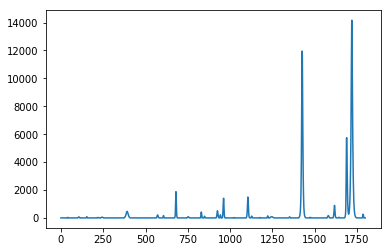

In [29]:
plt.plot(orig[0])

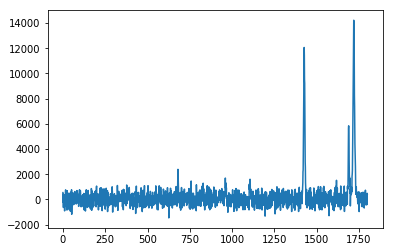

In [28]:
plt.plot(noisy[0])

In [24]:
f2[0].data[0]

array([ 544.5, -219.5,  414.5, ..., -403.5,  489.5,  409.5], dtype=float32)

(array([      0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0., 2376750.,  255050.,  133611.,   83847.,   58300.,
          42653.,   32608.,   25912.,   21426.,   17622.,   14958.,
          12688.,   11015.,    9677.,    8661.,    7703.,    6888.,
           6234.,    5708.,    4983.,    4688.,    4295.,    4008.,
           3673.,    3393.]),
 array([-2000., -1920., -1840., -1760., -1680., -1600., -1520., -1440.,
        -1360., -1280., -1200., -1120., -1040.,  -960.,  -880.,  -800.,
         -720.,  -640.,  -560.,  -480.,  -400.,  -320.,  -240.,  -160.,
          -80.,     0.,    80.,   160.,   240.,   320.,   400.,   480.,
          560.,   640.,   720.,   800.,   880.,   960.,  1040.,  1120.,
         1200.,  1280.,  1360.,  1440.,  1520.,  1600.,  1680.,  1

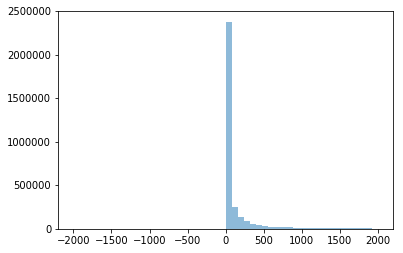

In [6]:
plt.hist(orig.flatten(),range=(-2000,2000),bins=50,alpha=0.5)

(array([3.00000e+00, 1.10000e+01, 3.00000e+01, 3.60000e+01, 1.00000e+02,
        1.81000e+02, 4.15000e+02, 8.09000e+02, 1.40500e+03, 2.48000e+03,
        4.30900e+03, 7.21500e+03, 1.14860e+04, 1.79310e+04, 2.63820e+04,
        3.78270e+04, 5.31890e+04, 7.15520e+04, 9.30120e+04, 1.16360e+05,
        1.41266e+05, 1.64982e+05, 1.86925e+05, 2.04455e+05, 2.16437e+05,
        2.19874e+05, 2.17344e+05, 2.09192e+05, 1.93000e+05, 1.74727e+05,
        1.52187e+05, 1.28657e+05, 1.06584e+05, 8.52110e+04, 6.77700e+04,
        5.28610e+04, 4.01320e+04, 3.07080e+04, 2.34430e+04, 1.81510e+04,
        1.42730e+04, 1.13550e+04, 9.32200e+03, 7.86300e+03, 6.68700e+03,
        5.86500e+03, 5.35200e+03, 4.74900e+03, 4.36300e+03, 3.95700e+03]),
 array([-2000., -1920., -1840., -1760., -1680., -1600., -1520., -1440.,
        -1360., -1280., -1200., -1120., -1040.,  -960.,  -880.,  -800.,
         -720.,  -640.,  -560.,  -480.,  -400.,  -320.,  -240.,  -160.,
          -80.,     0.,    80.,   160.,   240.,   32

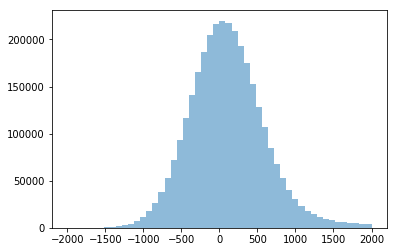

In [5]:
plt.hist(noisy.flatten(),range=(-2000,2000),bins=50,alpha=0.5)

# Detection and Extraction step

# Final fits

In [34]:
f = fits.open("data/projectLSST-g1_0-g2_0/final_fits.fits")
t = Table.read("data/projectLSST-g1_0-g2_0/final_fits.fits")

2602917000000.0